# Data Cleaning with Python workshop

by: Benedict Neo
date: 19/07/2021

## Load libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# make plot show up without plt.show()
%matplotlib inline

# plot configurations
plt.rcParams["figure.figsize"] = (10, 8) 
plt.style.use('fivethirtyeight')

# date time library
import datetime as dt

## Helper functions

In [ ]:
def missing_cols(df):
    '''
    prints out columns with its amount of missing values with its %

    eg. column_A => 100 [10%]
    
    the above means column_A has 100 missing values, 10% of the entire column 
    '''

    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        # mean = sum / total
        pct = df[col].isnull().mean() * 100 
        if missing_vals != 0:
          print('{} => {} [{}%]'.format(col, df[col].isnull().sum(), round(pct, 2)))
        total += missing_vals
    
    if total == 0:
        print("no missing values left 🎉 ")

def get_memory(df):
  """ prints out size of data frame in MB """
  print(f"{round(df.memory_usage().sum() / 1000000, 2)} MB")

## Load data

In [ ]:
# data from github repo: https://github.com/benthecoder/data-cleaning-with-py-workshop
url = 'https://raw.githubusercontent.com/benthecoder/data-cleaning-with-py-workshop/main/dirty_AB_NYC_2019.csv'

df = pd.read_csv(url)

### data frame shape 


In [ ]:
df.shape # (no. of rows, no. of columns)

(48896, 16)

### data frame summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48896 entries, 0 to 48895
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48896 non-null  int64  
 1   NAME                            48880 non-null  object 
 2   host id                         48896 non-null  int64  
 3   host name                       48875 non-null  object 
 4   neighbourhood group             48896 non-null  object 
 5   neighbourhood                   48896 non-null  object 
 6   latitude                        48896 non-null  float64
 7   longitude                       48896 non-null  float64
 8   room type                       48896 non-null  object 
 9   price                           48896 non-null  object 
 10  minimum nights                  48896 non-null  int64  
 11  number of reviews               48896 non-null  int64  
 12  last review                     

### data frame data types

In [ ]:
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host name                          object
neighbourhood group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room type                          object
price                              object
minimum nights                      int64
number of reviews                   int64
last review                        object
reviews per month                 float64
calculated host listings count      int64
availability 365                    int64
dtype: object

### First 5 rows of data

In [ ]:
df.head()

,id,NAME,host id,host name,neighbourhood group,neighbourhood,latitude,longitude,room type,price,minimum nights,number of reviews,last review,reviews per month,calculated host listings count,availability 365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,$149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,$225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,$150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,$89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,$80,10,9,2018-11-19,0.10,1,0


### First row of data

In [ ]:
df.head(n=1)

,id,NAME,host id,host name,neighbourhood group,neighbourhood,latitude,longitude,room type,price,minimum nights,number of reviews,last review,reviews per month,calculated host listings count,availability 365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,$149,1,9,2018-10-19,0.21,6,365


### Last five rows of data

In [ ]:
df.tail()

,id,NAME,host id,host name,neighbourhood group,neighbourhood,latitude,longitude,room type,price,minimum nights,number of reviews,last review,reviews per month,calculated host listings count,availability 365
48891,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,$70,2,0,NaN,NaN,2,9
48892,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,$40,4,0,NaN,NaN,2,36
48893,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,$115,10,0,NaN,NaN,1,27
48894,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,$55,1,0,NaN,NaN,6,2
48895,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,$90,7,0,NaN,NaN,1,23


### Randomly sample rows

In [ ]:
df.sample(n = 5)

,id,NAME,host id,host name,neighbourhood group,neighbourhood,latitude,longitude,room type,price,minimum nights,number of reviews,last review,reviews per month,calculated host listings count,availability 365
26928,21325658,Room for rent,154375347,Stan,Manhattan,Kips Bay,40.74524,-73.97995,Private room,$75,4,1,2017-10-28,0.05,1,0
14945,11872337,"Spacious loft apt, with plenty of light",3803638,Shai,Brooklyn,Bedford-Stuyvesant,40.69178,-73.95917,Entire home/apt,$99,3,35,2019-07-01,0.90,1,39
2942,1702032,The Top-Notch Top-Floor,8986314,Stephen,Brooklyn,Greenpoint,40.73370,-73.95427,Private room,$90,1,0,NaN,NaN,1,0
43084,33431709,Shared apartment by the Central Park,251852817,Owen,Manhattan,East Harlem,40.80073,-73.94328,Shared room,$45,1,17,2019-06-30,5.10,7,72
47575,35807411,Beautiful private room in 3br apartment!,2367604,Sagi,Queens,Ridgewood,40.70694,-73.91552,Private room,$50,1,0,NaN,NaN,1,67


## Rename columns

In [ ]:
# show columns of dataframe
df.columns

Index(['id', 'NAME', 'host id', 'host name', 'neighbourhood group',
       'neighbourhood', 'latitude', 'longitude', 'room type', 'price',
       'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [ ]:
df.columns.to_list() # turn into list

['id',
 'NAME',
 'host id',
 'host name',
 'neighbourhood group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room type',
 'price',
 'minimum nights',
 'number of reviews',
 'last review',
 'reviews per month',
 'calculated host listings count',
 'availability 365']

### string methods

In [ ]:
# replace whitespace with underscore '_'
df.columns = df.columns.str.replace(' ', "_")

# lower case column names
df.columns = df.columns.str.lower() 

df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### pandas rename

In [ ]:
# {'original_name' : 'new_name'}
new_names = {'name':'listing_name', 
             'latitude':'lat', 
             'longitude':'long'}

df.rename(columns = new_names).columns # only returning output

# without inplace=True, not updating our dataframe
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### inplace = True

- updates the data frame itself instead of returning an output

In [ ]:
df.rename(columns = new_names, inplace = True)
df.columns

Index(['id', 'listing_name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'lat', 'long', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

A cool library for data cleaning is pyjanitor which provides easy implementations for many data cleaning tasks, check it out [here](https://pyjanitor.readthedocs.io/)

## Remove labels from values

- dollar sign -> Mixture of string and integer
- cause problems when filling in missing values or converting data types
- remove dollar sign and labels similar



In [ ]:
# grab the price column
df['price']

0        $149
1        $225
2        $150
3         $89
4         $80
         ... 
48891     $70
48892     $40
48893    $115
48894     $55
48895     $90
Name: price, Length: 48896, dtype: object

In [ ]:
df['price'] = df['price'].str.replace("$", "")
df['price'].head(3)

0    149
1    225
2    150
Name: price, dtype: object

In [ ]:
# check price column data type
df['price'].dtype

dtype('O')

## Converting data types

![dtypes](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn-images-1.medium.com%2Fmax%2F2000%2F1*wrXMq7iTWih7lsBBRQFxXg.png&f=1&nofb=1)

[Overview here](https://pbpython.com/pandas_dtypes.html)

### Converting to numeric

In [ ]:
df['price'] = pd.to_numeric(df['price'])
df['price'].dtype

dtype('int64')

In [ ]:
df.head(1)

,id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,lat,long,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [ ]:
# view dtype of all columns
df.dtypes

id                                  int64
listing_name                       object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
lat                               float64
long                              float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### Convert to category

- `neighbourhood_group`
- `neighbourhood`
- `room_type`

Guidelines for conversion
- to reduce memory and increase performance with operations related to categorical data
- make sure data is clean before converting it

[More on this](https://pbpython.com/pandas_dtypes_cat.html)

In [ ]:
# check unique values in categorical column
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens',
       'Staten Island', 'Bronx'], dtype=object)

In [ ]:
# show amount of categories in column
len(df['neighbourhood'].unique())

221

In [ ]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
get_memory(df)

6.26 MB


In [ ]:
# for categorical data with small amounts of categories, converting them to 
# dtype category can save memory and make some operations more efficient 

df['room_type'] = df['room_type'].astype('category')

In [ ]:
df['room_type'].dtype

CategoricalDtype(categories=['Entire home/apt', 'Private room', 'Shared room'], ordered=False)

In [ ]:
df['room_type'].unique()

['Private room', 'Entire home/apt', 'Shared room']
Categories (3, object): ['Private room', 'Entire home/apt', 'Shared room']

In [ ]:
get_memory(df)

5.92 MB


### Convert to datetime 

In [ ]:
df['last_review'].head(3)

0    2018-10-19
1    2019-05-21
2           NaN
Name: last_review, dtype: object

In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'], format = "%Y-%m-%d")
df['last_review'].dtype

dtype('<M8[ns]')

Refer to https://strftime.org/ for a list of date formats

In [ ]:
df.dtypes

id                                         int64
listing_name                              object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
lat                                      float64
long                                     float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [ ]:
df['last_review'].head(3)

0   2018-10-19
1   2019-05-21
2          NaT
Name: last_review, dtype: datetime64[ns]

### Changing numeric types

ex: changing int types (int8 | int16 | int32 | int64)

- the numbers stands for bit
- int8 can store integers from -128 to 127.
- int16 can store integers from -32768 to 32767.
- int64 can store integers from -9223372036854775808 to 9223372036854775807.

In [ ]:
# get maximum from column
df['minimum_nights'].max()

1250

In [ ]:
# get minimum from column
df['minimum_nights'].min()

1

In [ ]:
df['minimum_nights'].dtype

dtype('int64')

In [ ]:
get_memory(df)

5.92 MB


In [ ]:
df['minimum_nights'] = df['minimum_nights'].astype('int16')
df['minimum_nights'].dtype

dtype('int16')

In [ ]:
get_memory(df)

5.62 MB


## Missing data

### Checking which columns have missing data

In [ ]:
df.isnull().head()

,id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,lat,long,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### summing the missing values

In [ ]:
# True = 1, False = 0
df.isnull().sum()

id                                    0
listing_name                         16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
lat                                   0
long                                  0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### percentage of missing data

In [ ]:
missing_cols(df)

listing_name => 16 [0.03%]
host_name => 21 [0.04%]
last_review => 10052 [20.56%]
reviews_per_month => 10052 [20.56%]


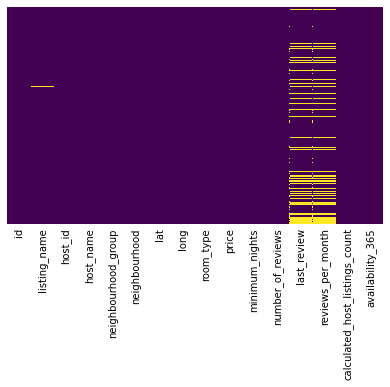

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis', cbar=False);

### How to deal with missing data?

Dealing with missing data is not simple task, you have need to consider why the data is missing in the first place, and domain knowledge to know what to impute. 

There also isn't a specific threshold for what percentage of missing data is accepted, it depends on the data.

If you mess it up, you will introduce bias to your data.  


#### Techniques 
1. Drop feature 
1. Drop the rows
1. Impute missing values (manually or automatically)

More information
- Read this [article](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4) to go deeper into this topic

- A paper on "The prevention and handling of the missing data" ([Link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/))

In [ ]:
# copying original data set is good practice when you're experimenting with things
# so you don't have to run all the cells before when you mess up something

df_ori = df.copy()

#### Dropping columns with missing values

- usually worst strategy unless it has a lot of missing data (over 80 or 90%), or feature is not useful

In [ ]:
# Create list of columns you want to drop
colsToDrop = ['id','host_name','host_id']

# axis = 1 / 'columns' stands for column
# axis = 0 / 'index' stands for row
df.drop(colsToDrop, axis = 'columns', inplace = True)

In [ ]:
missing_cols(df)

listing_name => 16 [0.03%]
last_review => 10052 [20.56%]
reviews_per_month => 10052 [20.56%]


In [ ]:
print(df.shape)

(48896, 13)


#### Remove rows with missing values
- Losing even more information (from other columns), so not the best method

In [ ]:
print(df.shape) 
print(df.dropna().shape)

(48896, 13)
(38838, 13)


#### Impute missing values


- A constant value related to the data, such as 0 for `number_of_reviews`, or "None" for `listing_name`.
- The value before or after the data point (backward fill, forward fill)
- Summary statistics such as mean, median or mode value for the column.
- A value estimated by algorithms or ML models like KNN.

> More detailed imputation techniques in this [article](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779)  

##### Imputing manually with pandas fillna

In [ ]:
df['reviews_per_month'].head(3)

0    0.21
1    0.38
2     NaN
Name: reviews_per_month, dtype: float64

In [ ]:
df['listing_name'].head(3)

0     Clean & quiet apt home by the park
1                  Skylit Midtown Castle
2    THE VILLAGE OF HARLEM....NEW YORK !
Name: listing_name, dtype: object

In [ ]:
# {"column_name" : "value_to_replace"}
missing_vals_replace = {'reviews_per_month': 0,
                        'listing_name':'None'}

df.fillna(value = missing_vals_replace).head(3)['reviews_per_month']

0    0.21
1    0.38
2    0.00
Name: reviews_per_month, dtype: float64

In [ ]:
# mean of reviews_per_month
reviews_mean = df['reviews_per_month'].mean()
print(reviews_mean)

df.fillna(value = {'reviews_per_month' : reviews_mean}).head(3)['reviews_per_month']

1.3731963752445946


0    0.210000
1    0.380000
2    1.373196
Name: reviews_per_month, dtype: float64

In [ ]:
# median of reviews_per_month
reviews_median = df['reviews_per_month'].median()
print(reviews_median)

df.fillna(value = {'reviews_per_month' : reviews_median}).head(3)['reviews_per_month']

0.72


0    0.21
1    0.38
2    0.72
Name: reviews_per_month, dtype: float64

##### Imputing with bfill and ffill

bfill
- bfill stands for backwards fill
- means filling in missing value with value after it (fill it backwards)

ffill
- ffill stands for forward fill
- means filling in missing value with value before it (fill it forwards)


In [ ]:
df['reviews_per_month'].head()

0    0.21
1    0.38
2     NaN
3    4.64
4    0.10
Name: reviews_per_month, dtype: float64

In [ ]:
# imputing with bfill
df['reviews_per_month'].bfill().head()

0    0.21
1    0.38
2    4.64
3    4.64
4    0.10
Name: reviews_per_month, dtype: float64

In [ ]:
# imputing with ffill
df['reviews_per_month'].ffill().head()

0    0.21
1    0.38
2    0.38
3    4.64
4    0.10
Name: reviews_per_month, dtype: float64

In [ ]:
df['last_review'].head()

0   2018-10-19
1   2019-05-21
2          NaT
3   2019-07-05
4   2018-11-19
Name: last_review, dtype: datetime64[ns]

In [ ]:
df['last_review'].ffill().head()

0   2018-10-19
1   2019-05-21
2   2019-05-21
3   2019-07-05
4   2018-11-19
Name: last_review, dtype: datetime64[ns]

In [ ]:
 # ffill entire data frame
 df.ffill().head(3)

,listing_name,neighbourhood_group,neighbourhood,lat,long,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-05-21,0.38,1,365


In [ ]:
missing_vals_replace = {'reviews_per_month':0,
                        'listing_name':'None'}

df.fillna(missing_vals_replace, inplace = True)

missing_cols(df)

last_review => 10052 [20.56%]


I leave date column empty because it makes more sense to leave it empty, and I don't want to introduce bias to it. this is a different case for time series data, as it's a must to impute missing values or analysis on the data won't work since it's cumulative

## Explode Date column

In [ ]:
df['last_review'].head()

0   2018-10-19
1   2019-05-21
2          NaT
3   2019-07-05
4   2018-11-19
Name: last_review, dtype: datetime64[ns]

In [ ]:
# Int64 are pandas data types that can handle missing values
df['year'] = df['last_review'].dt.year.astype('Int64')
df['month'] = df['last_review'].dt.month.astype('Int64')
df['day'] = df['last_review'].dt.day.astype('Int64')

In [ ]:
df.head(3)

,listing_name,neighbourhood_group,neighbourhood,lat,long,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,19
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,5,21
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,<NA>,<NA>,<NA>


## Data Inconsistencies

### out of range data

#### Are the values in the column `availability_365` within 365 ?

In [ ]:
# show statistics of a column
df['availability_365'].describe()

count    48896.000000
mean       112.779021
std        131.621931
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

##### Assert keyword

In [ ]:
assert 1 + 1 == 2

In [ ]:
assert 1 + 1 == 3

AssertionError: ignored

In [ ]:
assert df['availability_365'].max() <= 365

In [ ]:
assert df['availability_365'].min() >= 0

#### Are lat and long coords valid coordinates?

- The latitude must be a number between -90 and 90 and the longitude between -180 and 180

Since you know the lat and long coords are for new york, you can ask the question whether the coords are within NYC itself

In [ ]:
df['lat'].describe()

count    48896.000000
mean        40.728948
std          0.054530
min         40.499790
25%         40.690098
50%         40.723070
75%         40.763112
max         40.913060
Name: lat, dtype: float64

In [ ]:
df['long'].describe()

count    48896.000000
mean       -73.952170
std          0.046156
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936278
max        -73.712990
Name: long, dtype: float64

The best way to make sure is to plot them out

Check out this [kaggle notebook](https://www.kaggle.com/dgomonov/data-exploration-on-nyc-airbnb/notebook) which does an analysis including plotting a new york city map containing these coordinates

### Categorical data inconsistency

- caused by human error (wrong spelling, different case categories)

In [ ]:
# show categories
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens',
       'Staten Island', 'Bronx'], dtype=object)

In [ ]:
wrong_spelling = ['brookln', 'manhatan']
right_spelling = ['Brooklyn', 'Manhattan']

# replace the wrong spelling with right spelling
df['neighbourhood_group'].replace(to_replace = wrong_spelling, 
                                  value = right_spelling, 
                                  inplace = True)

# changing values removes the category date type
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

Usually it isn't so easy to deal with these value consistency since there could be hundreds of categories like the neighborhood column which has over 200 types, there are two ways to deal with this issue

1. Preprocess the text (lowercase, strip whitespace)
1. Use fuzzy matching to find similar words, and replace them. ([example](https://www.kaggle.com/rtatman/data-cleaning-challenge-inconsistent-data-entry/?scriptVersionId=3012975&cellId=14))

### Duplicate rows

In [ ]:
# are there any duplicate rows?
df.duplicated().any()

True

In [ ]:
# how many rows are duplicated?
df.duplicated().sum()

1

In [ ]:
# show me the duplicated row
df[df.duplicated()]

,listing_name,neighbourhood_group,neighbourhood,lat,long,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
7,BlissArtsSpace!,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.4,1,0,2017,10,5


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().any()

False

## Outliers

What?
- data point that is far from other observations in our data
- it arises from to erorrs in data collection or due to the influence of various factors on data
- when there are outliers which indicates erroneous or abnormal data then we can either remove them or correct them.

How to detect?
- with boxplots and histograms
- statistical methods like IQR, skewness, etc.

> To choose the best way to handle outliers one must have a good domain knowledge and information about where the data come from and what they mean ; it also depends on what analysis one is planning to perform.

More about data cleaning and outliers
- https://www.pluralsight.com/guides/cleaning-up-data-from-outliers
- https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba 
- https://www.kaggle.com/rtatman/data-cleaning-challenge-scale-and-normalize-data
- https://aakada.wordpress.com/2019/02/24/how-to-deal-with-outliers-using-python-pandas/

### Continuous data

In [ ]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

#### plotting a histogram

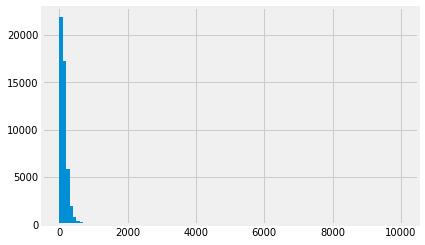

In [ ]:
df['price'].hist(bins=100);

#### Plotting a boxplot

![boxplot](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.simplypsychology.org%2Fboxplot-outliers.png&f=1&nofb=1)

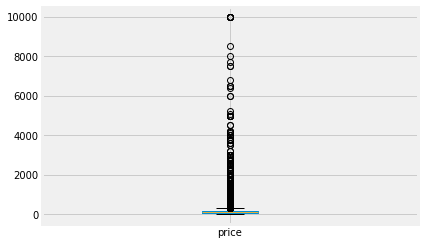

In [ ]:
df.boxplot(column=['price']);

### Categorical data

In [ ]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

#### Plotting a bar plot



In [ ]:
# count of each category
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

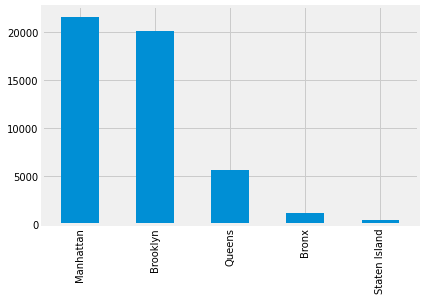

In [ ]:
# plot a bar plot from value counts
df['neighbourhood_group'].value_counts().plot.bar();

In [ ]:
other_index = df['neighbourhood_group'].value_counts()[2:].index

# grab the indexes of the other categories, and tell pandas to change them 
# to 'Other'
df.loc[df['neighbourhood_group'].isin(other_index), 'neighbourhood_group'] = 'Other'

df['neighbourhood_group'].value_counts()

Manhattan    21661
Brooklyn     20104
Other         7130
Name: neighbourhood_group, dtype: int64

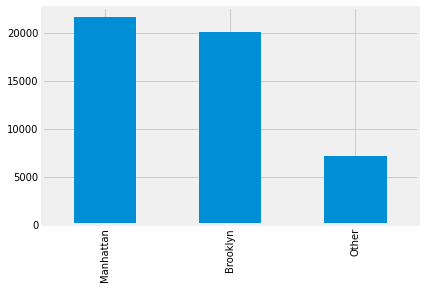

In [ ]:
df['neighbourhood_group'].value_counts().plot.bar();

In [ ]:
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')

## Save final cleaned dataset

In [ ]:
df.to_csv("clean_AB_NYC_2019.csv")